# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [71]:
# Connection

from utils import db_connect
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine
# Step 0. Load libraries and modules
# Dataframes and matrices ----------------------------------------------
import pandas as pd
import numpy as np
# Graphics -------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Statistics -----------------------------------------------------------
import statsmodels.formula.api as smf
from statsmodels.api import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# Machine learning -----------------------------------------------------
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.linear_model import LassoCV
# Preprocessing --------------------------------------------------------
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Metrics --------------------------------------------------------------
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [72]:
#load the .env file variables
load_dotenv()
connection_string = os.getenv('DATABASE_URL')
#print(connection_string)


In [73]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/dataset.csv', sep=',')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [75]:
df.sample(10)

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
1280  26103    66516   6599                9.920921    8113   
1659  31015     1955    195                9.974425     214   
1273  26089    21764   1821                8.367028    2047   
2190  40123    38247   5275               13.791931    5247   
1046  21111   770517  95198               12.355081   93602   
1424  28051    17622   2409               13.670412    2792   
43     1087    18439   1694                9.187049    2507   
1731  31159    17318   2191               12.651576    2740   
918   20065     2492    255               10.232745     268   
1530  29099   224347  27650               12.324658   29055   

      10-19 y/o % of total pop   20-29  20-29 y/o % of total pop   30-39  \
1280                 12.197065   11595                 17.431896    7537   
1659                 10.946292     178                  9.104859     162   
1273                  9.405440    1931                  8.872450    1965   
2190                 13.718723    5736                 14.997255    4855   
1046                 12.147947  108453                 14.075355  104836   
1424                 15.843832    2703                 15.338781    1975   
43                   13.596182    3437                 18.639839    1671   
1731                 15.821688    2285                 13.194364    2057   
918                  10.754414     220                  8.828250     256   
1530                 12.950920   26174                 11.666748   30076   

      30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
1280                 11.331108  ...         4659                 10.4   
1659                  8.286445  ...          135                 12.7   
1273                  9.028671  ...         1586                 11.6   
2190                 12.693806  ...         2498                 11.9   
1046                 13.605930  ...        56533                 12.9   
1424                 11.207581  ...         1633                 21.9   
43                    9.062314  ...         1489                 19.8   
1731                 11.877815  ...          798                  8.6   
918                  10.272873  ...          186                 14.2   
1530                 13.406018  ...        15022                 10.6   

      diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number  \
1280                    9.4                   11.3             5672   
1659                   11.6                   13.9              202   
1273                   10.3                   12.9             2122   
2190                   11.1                   12.7             3445   
1046                   12.0                   13.8            77384   
1424                   20.7                   23.1             2882   
43                     18.5                   21.2             3037   
1731                    7.9                    9.4             1139   
918                    13.0                   15.5              285   
1530                    9.6                   11.5            18248   

      CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
1280             3.0               2.8               3.3        1650   
1659             3.7               3.5               4.1          59   
1273             3.4               3.2               3.8         630   
2190             3.2               3.0               3.4         925   
1046             3.2               3.0               3.4       19143   
1424             5.2               4.9               5.6         688   
43               4.6               4.2               4.9         697   
1731             2.7               2.5               2.9         351   
918              3.9               3.6               4.2          78   
1530             2.8               2.6               3.0        4742   

      Urban_rural_code  
1280                 5  
1659                 6  
1273                 5

In [76]:
# Instrucciones
# Datos sociodemográficos y de recursos de salud a nivel de condado de EE. UU. (2018-2019)
# Debe seleccionar una de las características relacionadas con los recursos de salud como su variable objetivo 'y' 
# luego usar la regresión LASSO para descubrir qué características son las más importantes como factores para explicar su variable objetivo.

In [77]:
#Step 2:

# Use the explore.ipynb notebook to find correlations between features or 
# between feature and your chosen target.
# Don't forget to write your observations
# Considere escalar características antes de aplicar LASSO.

In [78]:
# copio la data

df_c = df.copy()

In [79]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [80]:
df_c.describe()

fips       TOT_POP           0-9  0-9 y/o % of total pop  \
count   3140.000000  3.140000e+03  3.140000e+03             3140.000000   
mean   30401.640764  1.041894e+05  1.274030e+04               11.871051   
std    15150.559265  3.335834e+05  4.180730e+04                2.124081   
min     1001.000000  8.800000e+01  0.000000e+00                0.000000   
25%    18180.500000  1.096325e+04  1.280500e+03               10.594639   
50%    29178.000000  2.580050e+04  3.057000e+03               11.802727   
75%    45081.500000  6.791300e+04  8.097000e+03               12.951840   
max    56045.000000  1.010552e+07  1.208253e+06               25.460677   

             19-Oct  10-19 y/o % of total pop         20-29  \
count  3.140000e+03               3140.000000  3.140000e+03   
mean   1.336798e+04                 12.694609  1.446933e+04   
std    4.228439e+04                  1.815044  4.957773e+04   
min    0.000000e+00                  0.000000  0.000000e+00   
25%    1.374500e+03                 11.674504  1.263750e+03   
50%    3.274000e+03                 12.687422  3.108000e+03   
75%    8.822250e+03                 13.659282  8.976250e+03   
max    1.239139e+06                 23.304372  1.557073e+06   

       20-29 y/o % of total pop         30-39  30-39 y/o % of total pop  ...  \
count               3140.000000  3.140000e+03               3140.000000  ...   
mean                  12.283979  1.391649e+04                 11.751535  ...   
std                    3.126297  4.899095e+04                  1.696599  ...   
min                    0.000000  1.100000e+01                  6.092789  ...   
25%                   10.496774  1.232750e+03                 10.689322  ...   
50%                   11.772649  3.000500e+03                 11.580861  ...   
75%                   13.182260  8.314250e+03                 12.639379  ...   
max                   37.570198  1.501844e+06                 22.225129  ...   

         COPD_number  diabetes_prevalence  diabetes_Lower 95% CI  \
count    3140.000000          3140.000000            3140.000000   
mean     5827.242357            13.073503              12.088089   
std     15720.551934             2.724351               2.622948   
min         7.000000             6.100000               5.500000   
25%       815.000000            11.200000              10.300000   
50%      1963.500000            12.800000              11.800000   
75%      4727.000000            14.800000              13.700000   
max    434075.000000            25.600000              24.200000   

       diabetes_Upper 95% CI  diabetes_number  CKD_prevalence  \
count            3140.000000      3140.000000     3140.000000   
mean               14.053726      9326.577707        3.446242   
std                 2.824828     29754.601185        0.568059   
min                 6.700000        11.000000        1.800000   
25%                12.100000      1187.750000        3.100000   
50%                13.800000      2743.000000        3.400000   
75%                15.900000      6679.250000        3.800000   
max                27.000000    952335.000000        6.200000   

       CKD_Lower 95% CI  CKD_Upper 95% CI     CKD_number  Urban_rural_code  
count       3140.000000       3140.000000    3140.000000       3140.000000  
mean           3.207516          3.710478    2466.234076          4.635350  
std            0.527740          0.613069    7730.422067          1.510447  
min            1.700000          1.900000       3.000000          1.000000  
25%            2.900000          3.300000     314.750000          3.000000  
50%            3.200000          3.700000     718.000000          5.000000  
75%            3.500000          4.100000    1776.250000          6.000000  
max            5.800000          6.600000  237766.000000          6.000000  

[8 rows x 106 columns]

In [81]:
# lista de variables

list(df_c.columns)

['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or 

In [82]:
# El data set de las 108 columnas tiene 106 columnas numericas, y solo dos categoricas, por lo que no
# sera necesario transformar la data.
df_c.describe(include='O')


COUNTY_NAME STATE_NAME
count         3140       3140
unique        1841         51
top     Washington      Texas
freq            31        254

In [83]:
from funpymodeling import freq_tbl

In [84]:
freq_tbl(df_c)

          COUNTY_NAME  frequency  percentage  cumulative_perc
0          Washington         31    0.009873         0.009873
1           Jefferson         26    0.008280         0.018153
2             Lincoln         24    0.007643         0.025796
3            Franklin         24    0.007643         0.033439
4             Jackson         24    0.007643         0.041083
...               ...        ...         ...              ...
1836       St. Mary's          1    0.000318         0.998726
1837     Queen Anne's          1    0.000318         0.999045
1838  Prince George's          1    0.000318         0.999363
1839          Harford          1    0.000318         0.999682
1840           Weston          1    0.000318         1.000000

[1841 rows x 4 columns]

----------------------------------------------------------------

              STATE_NAME  frequency  percentage  cumulative_perc
0                  Texas        254    0.080892         0.080892
1                Georgia        15

In [85]:
# se quiere predecir la prevalencia de ataques al corazon en la poblacion de estudio
# 'Heart disease_prevalence' esta es la variable seleccionada
df_heart = pd.DataFrame(df_c.corrwith(df['Heart disease_prevalence'], axis=0), columns=['correlacion'])
df_heart

correlacion
fips                       0.007443
TOT_POP                   -0.300905
0-9                       -0.302992
0-9 y/o % of total pop    -0.229493
19-Oct                    -0.311823
...                             ...
CKD_prevalence             0.892792
CKD_Lower 95% CI           0.874806
CKD_Upper 95% CI           0.908082
CKD_number                -0.267543
Urban_rural_code           0.518151

[106 rows x 1 columns]

In [86]:
df_heart[abs(df_heart['correlacion']) > 0.85]

correlacion
Heart disease_prevalence       1.000000
Heart disease_Lower 95% CI     0.997441
Heart disease_Upper 95% CI     0.997752
COPD_prevalence                0.886726
COPD_Lower 95% CI              0.877945
COPD_Upper 95% CI              0.890111
diabetes_Upper 95% CI          0.850717
CKD_prevalence                 0.892792
CKD_Lower 95% CI               0.874806
CKD_Upper 95% CI               0.908082

In [87]:
# para sacar la lista de las variables que eliminaremos
df_heart[abs(df_heart['correlacion'])> 0.85].index

Index(['Heart disease_prevalence', 'Heart disease_Lower 95% CI',
       'Heart disease_Upper 95% CI', 'COPD_prevalence', 'COPD_Lower 95% CI',
       'COPD_Upper 95% CI', 'diabetes_Upper 95% CI', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI'],
      dtype='object')

In [88]:
# como se encontraron algunas variables con una correlacion alta, las sacaremos en la limpieza 
# y eleccion de las variables predictoras

In [89]:
# elegimos que variables usaremos para la regresion, necesitamos limpiar las que tienen una correlacion
# elevada entre ellas para que no exista multicolinealidad

df_heart.corr()

correlacion
correlacion          1.0

In [90]:
df_c.sample(5)

fips  TOT_POP     0-9  0-9 y/o % of total pop  19-Oct  \
1186  23023    35634    3619               10.156031    3821   
1206  24033   909308  116384               12.799184  112528   
257    8029    30953    3221               10.406100    3571   
2074  39067    15174    1627               10.722288    1862   
295    8105    11250    1362               12.106667    1466   

      10-19 y/o % of total pop   20-29  20-29 y/o % of total pop   30-39  \
1186                 10.722905    3555                  9.976427    4208   
1206                 12.375125  129463                 14.237530  128877   
257                  11.536846    2924                  9.446580    3181   
2074                 12.270990    1573                 10.366416    1562   
295                  13.031111    1302                 11.573333    1380   

      30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
1186                 11.808947  ...         2246                 10.2   
1206                 14.173085  ...        39884                 14.4   
257                  10.276871  ...         2243                 12.0   
2074                 10.293924  ...         1440                 14.7   
295                  12.266667  ...          619                 11.6   

      diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number  \
1186                    9.3                   11.3             2945   
1206                   13.3                   15.4           101516   
257                    11.0                   13.0             2971   
2074                   13.6                   15.9             1767   
295                    10.8                   12.5             1013   

      CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
1186             3.0               2.8               3.3         875   
1206             3.2               3.0               3.4       22511   
257              3.9               3.7               4.3         978   
2074             3.6               3.4               4.0         437   
295              3.6               3.4               3.8         312   

      Urban_rural_code  
1186                 3  
1206                 2  
257                  6  
2074                 6  
295                  6  

[5 rows x 108 columns]

In [91]:
# las eliminaremos

X = df_c.drop(['Heart disease_prevalence','fips', 'MEDHHINC_2018', 'CI90LBINC_2018', 'CI90UBINC_2018',
       'Median_Household_Income_2018', 'anycondition_prevalence',
       'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI',
       'Heart disease_prevalence', 'Heart disease_Lower 95% CI',
       'Heart disease_Upper 95% CI', 'COPD_prevalence', 'COPD_Lower 95% CI',
       'COPD_Upper 95% CI', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'CKD_prevalence', 'CKD_Lower 95% CI',
       'CKD_Upper 95% CI', 'STATE_NAME', 'COUNTY_NAME','N_POP_CHG_2018','GQ_ESTIMATES_2018'], axis=1)
y = df_c['Heart disease_prevalence']

In [92]:
# divido la data de entrenamiento y la data de validacion
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=45)

In [93]:
# Uno X_train con y_train en un DataFrame

df_train = pd.concat([X_train,y_train], axis=1)

In [94]:
df_train.info() # la data de 3140 se redujo a 2355 para el dataset de entrenamiento y 88 columnas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 37 to 3019
Data columns (total 85 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   TOT_POP                                                                        2355 non-null   int64  
 1   0-9                                                                            2355 non-null   int64  
 2   0-9 y/o % of total pop                                                         2355 non-null   float64
 3   19-Oct                                                                         2355 non-null   int64  
 4   10-19 y/o % of total pop                                                       2355 non-null   float64
 5   20-29                                                                          2355 non-null   int64  
 6   20-29 y/o % of total po

In [95]:
df_train.sample(10)

TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
1509     7569    789               10.424098     924   
1548    16121   2132               13.224986    2157   
906     18717   2327               12.432548    2522   
1100    12311   1755               14.255544    1841   
556      7634    593                7.767881     833   
633     37820   4772               12.617663    4370   
2472   465289  53282               11.451378   58472   
944      9722   1263               12.991154    1251   
3040     8285    875               10.561255     936   
442    236612  32200               13.608777   38480   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
1509                 12.207689    707                  9.340732    782   
1548                 13.380063   2020                 12.530240   2226   
906                  13.474382   1919                 10.252711   2272   
1100                 14.954106   1443                 11.721225   1407   
556                  10.911711    558                  7.309405    667   
633                  11.554733   4661                 12.324167   4662   
2472                 12.566813  74628                 16.039064  60737   
944                  12.867723    921                  9.473359   1094   
3040                 11.297526    822                  9.921545    802   
442                  16.262911  21375                  9.033777  31429   

      30-39 y/o % of total pop  40-49  ...  Obesity_prevalence  \
1509                 10.331616    857  ...                36.2   
1548                 13.808076   2104  ...                35.8   
906                  12.138697   2093  ...                40.3   
1100                 11.428804   1485  ...                41.8   
556                   8.737228    862  ...                31.4   
633                  12.326811   4617  ...                38.2   
2472                 13.053608  57118  ...                30.1   
944                  11.252829    976  ...                39.0   
3040                  9.680145   1016  ...                41.3   
442                  13.282927  40986  ...                26.2   

      Obesity_Lower 95% CI  Obesity_Upper 95% CI  Obesity_number  \
1509                  34.2                  37.9            2176   
1548                  33.9                  37.7            4363   
906                   38.5                  42.1            5754   
1100                  40.0                  43.6            3771   
556                   29.4                  33.3            1992   
633                   36.4                  40.0           11249   
2472                  28.7                  31.6          110677   
944                   36.9                  40.8            2888   
3040                  39.3                  43.3            2737   
442                   24.8                  27.6           45013   

      Heart disease_number  COPD_number  diabetes_number  CKD_number  \
1509                   665          762              910         242   
1548                   928         1122             1340         357   
906                   1194         1217             1780         481   
1100                   904         1138             1369         318   
556                    559          500              829         223   
633                   2487         2872             3565        1005   
2472                 26639        30479            42410       10606   
944                    654          643              965         251   
3040                   881         1115             1211         284   
442                   8682         8922            15220        3949   

      Urban_rural_code  Heart disease_prevalence  
1509                 6                      11.1  
1548                 4                       7.6  
906                  6                       8.4  
1100                 6                      10.0  
556                  3                       8.8  

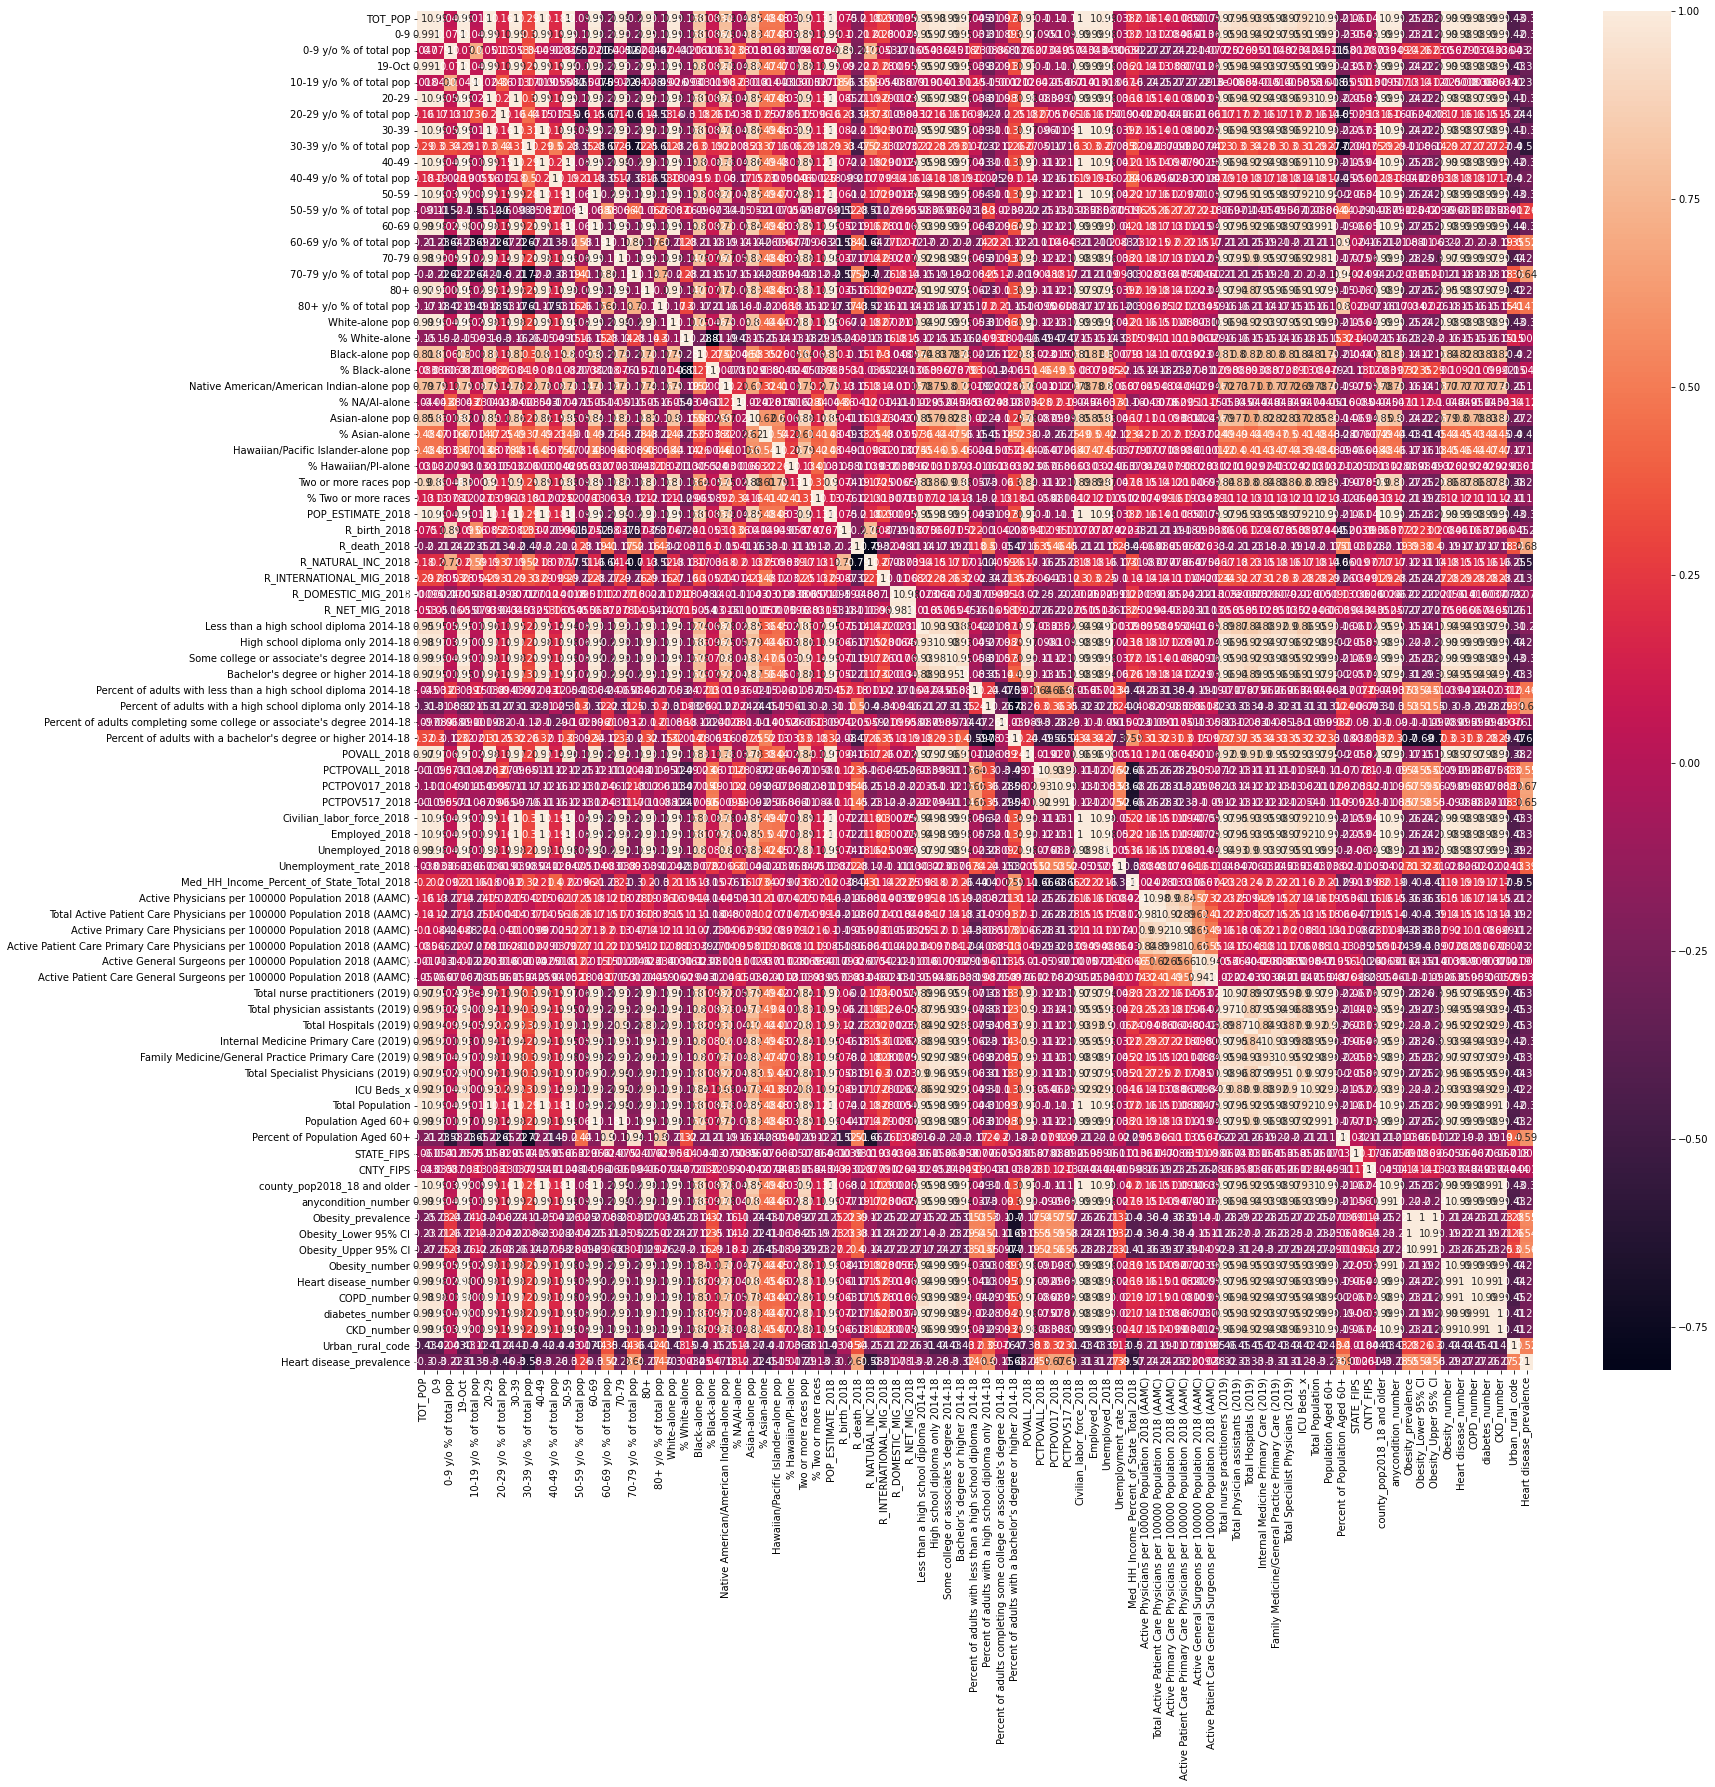

In [96]:
# hacemos una matriz de correlacion de todas las variables independientes
plt.figure(figsize=(25,25))
corr_matriz = df_train.corr()
heat_map = sns.heatmap(corr_matriz, annot=True)
plt.show()


In [97]:
df_train.shape

(2355, 85)

In [98]:
# Creación y entrenamiento del modelo
# ==============================================================================
modelo = LinearRegression(normalize=True)
modelo.fit(X = X_train, y = y_train)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

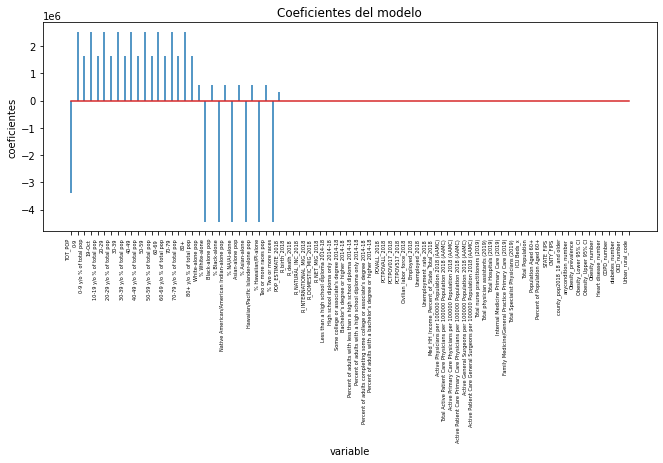

In [99]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [100]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([11.48102456, 10.69504941, 10.96545082, 11.07998532,  9.96538883,
        9.3698343 ,  7.70781857, 10.01550442,  8.36291081,  8.03761244])

In [101]:
# Error de test del modelo 
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 0.4717598809578267


In [102]:
# Las predicciones del modelo final se alejan en promedio en 0.47 unidades del valor real

In [103]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

In [104]:
# Aplicar Ridge

# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto RidgeCV utiliza el mean squared error
modelo = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )

modelo.fit(X = X_train, y = y_train)


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alphas to: original_alphas * n_samples. 
  warnings.warn(


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To re

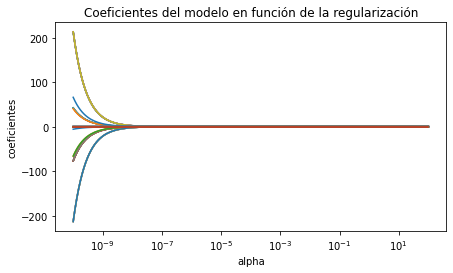

In [105]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

In [106]:
# se entiende que a medida que el alpha aumenta la regularizacion Ridge es mayor
# y el valor de los coheficientes se reduce

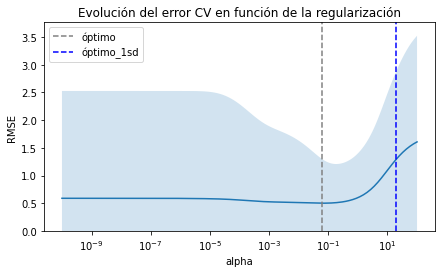

In [107]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [108]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 0.06368249944718586


In [109]:
# El mejor valor de alpha encontrado es 0.06

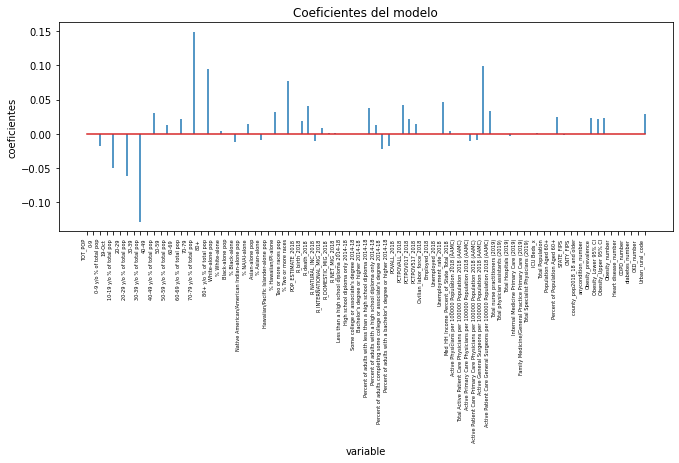

In [110]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [111]:
# se observa como el orden de magnitud de los coeficientes es mucho menor que  con
# el modelo de minimos cuadrados

In [112]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([11.4869155 , 10.7340175 , 10.83868647, 10.97343549, 10.07937525,
        9.46599087,  7.67351966, 10.08605419,  8.32911286,  8.13441443])

In [113]:
# Error de test del modelo 
# ==============================================================================
rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 0.5029589734185713


In [114]:
# finalmente las predicciones del modelo final solo se alejan en promedio 
# en 0.50 unidades de los valores reales

In [115]:
#Step 3:

# Now that you have a better knowledge of the data, 
# apply the LASSO model which already includes feature selection to obtain the most 
# important features that influence in your target variable.
# No vamos a predecir nada, 
# pero no olvide descartar todas las características relacionadas con los recursos de salud de su conjunto de datos X (características) y defina su objetivo elegido como su 'y'.
# Use ordinary least squares regression to choose the parameters that minimize the error of a linear function.


In [116]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto LassoCV utiliza el mean squared error
modelo = LassoCV(
            alphas          = np.logspace(-10, 3, 200),
            normalize       = True,
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8279246266511109, tolerance: 0.6518843454459652
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6303161899031693, tolerance: 0.6518843454459652
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.584553465243971, tolerance: 0.6518843454459652
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versio

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

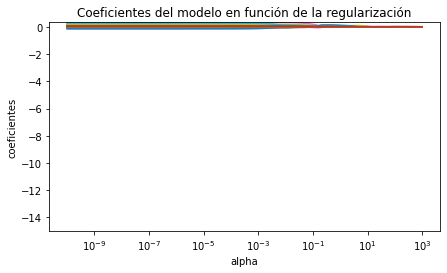

In [117]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

In [118]:
# Evidenmente los predictores quedan excluidos

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

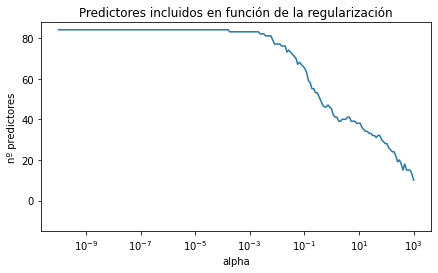

In [119]:
# Número de predictores incluidos (coeficiente !=0) en función de alpha
# ==============================================================================
alphas = modelo.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización');

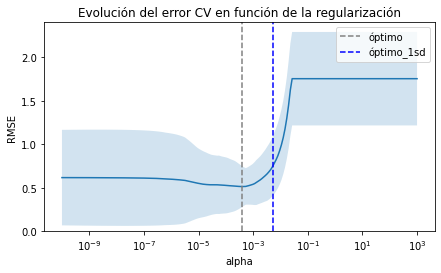

In [120]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)
mse_cv = modelo.mse_path_.mean(axis=1)
mse_sd = modelo.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas_, rmse_cv)
ax.fill_between(
    modelo.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [121]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 0.0003962688638701486


In [122]:
# Mejor valor alpha encontrado + 1sd
# ==============================================================================
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

print(f"Mejor valor de alpha encontrado + 1 desviación estándar: {optimo_1sd}")

Mejor valor de alpha encontrado + 1 desviación estándar: [0.00511143]


In [126]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto ElasticNetCV utiliza el mean squared error
modelo = ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            normalize       = True,
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3259.405439241847, tolerance: 0.6518843454459652
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/

In [127]:
# Evolución del error en función de alpha y l1_ratio
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha y l1_ratio.
# Tiene dimensiones (n_l1_ratio, n_alpha, n_folds)

# Error medio de las 10 particiones por cada valor de alpha y l1_ratio 
mean_error_cv = modelo.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha)
# Se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [modelo.l1_ratio, modelo.alphas_],
                                    names     = ['l1_ratio', 'modelo.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

l1_ratio  modelo.alphas_    mse_cv   rmse_cv
1298      0.99        0.000396  0.262709  0.512551
113       0.00        0.000042  0.262815  0.512655
114       0.00        0.000036  0.262931  0.512768
1299      0.99        0.000341  0.262942  0.512779
112       0.00        0.000048  0.263011  0.512846
...        ...             ...       ...       ...
1021      0.95       42.475716  3.081024  1.755284
1020      0.95       49.370479  3.081024  1.755284
1019      0.95       57.384416  3.081024  1.755284
1033      0.95        6.985880  3.081024  1.755284
408       0.50      300.183581  3.081024  1.755284

[1400 rows x 4 columns]

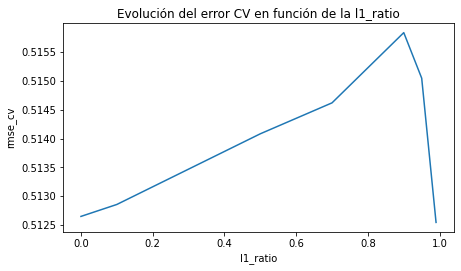

In [128]:
# Mejor valor encontrado para cada l1_ratio
fig, ax = plt.subplots(figsize=(7, 3.84))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

In [129]:
# Mejor valor alpha y l1_ratio_ encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {modelo.l1_ratio_}")

Mejor valor de alpha encontrado: 0.0003962688638701486
Mejor valor de l1_ratio encontrado: 0.99


In [130]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

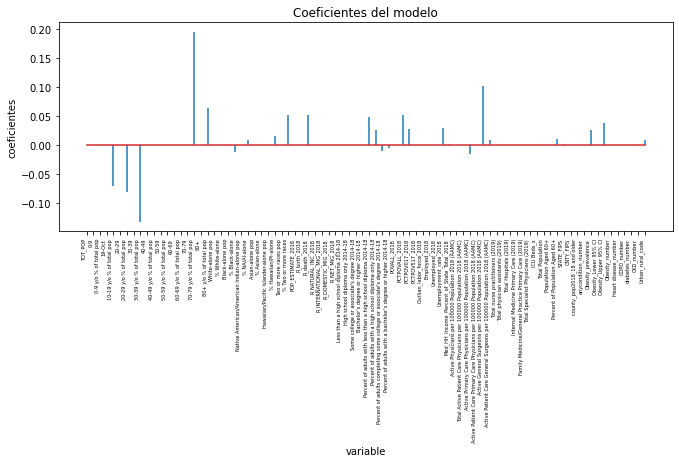

In [131]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [132]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

In [133]:
# Error de test del modelo 
# ==============================================================================
rmse_elastic = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
               )
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")


El error (rmse) de test es: 0.5060500596259715


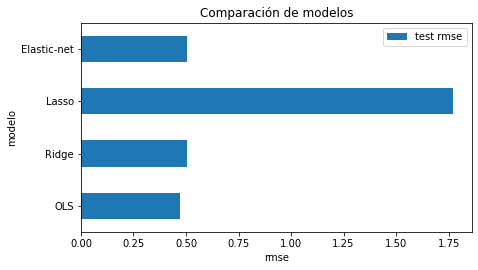

In [134]:
# Comparamos los cuatro modelos, con el error de test (rmse) de los 4 modelos

df_comparacion = pd.DataFrame({
                    'modelo': ['OLS', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_ols, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

In [ ]:
# Segun lo observado, el mejor modelo resulto ser el OLS, seguido por Ridge, 
# Tanto para Lasso, como para Elastic-net que los combina a ambos, el modelo empeora

In [ ]:
#Step 4:

#Use the app.py to create your pipeline that selects the most important features.

#Save your final model in the 'models' folder.

#In your README file write a brief summary.